## Monte Carlo...prediciendo precios de las acciones

In [1]:
import numpy as np  
import pandas as pd  
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

data = pd.read_csv('D:/Python/MSFT_2000.csv', index_col = 'Date')

log_rend = np.log(1 + data.pct_change())
u = log_rend.mean()
var = log_rend.var()
drift = u - (0.5 * var)
stdev = log_rend.std()

drift.val
stdev.val

t_int = 250
it = 10

ret_diarios = np.exp(drift.val + stdev.val * norm.ppf(np.random.rand(t_int, it)))

***

Creamos S0 igual al precio de cierre de Microsoft.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    77.610001
Name: 2017-10-18, dtype: float64

Creamos precio_lista con las mismas dimensiones que rendimiento o retorno diario. 

In [3]:
precio_lista = np.zeros_like(ret_diarios)
precio_lista

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
precio_lista[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Valores de la primera columna del array iguales a S0.

In [5]:
precio_lista[0] = S0
precio_lista

array([[ 77.610001,  77.610001,  77.610001, ...,  77.610001,  77.610001,
         77.610001],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

Creamos un loop en el rango (1, t_int) que reasigna el precio en tiempo t al producto del precio del día (t-1) con los valores del rendimiento diario en t.

In [6]:
for t in xrange(1, t_int):
    precio_lista[t] = precio_lista[t - 1] * ret_diarios[t]

In [7]:
precio_lista

array([[ 77.610001  ,  77.610001  ,  77.610001  , ...,  77.610001  ,
         77.610001  ,  77.610001  ],
       [ 78.35790748,  79.27291243,  76.4867635 , ...,  78.23018728,
         79.38229157,  74.29955719],
       [ 77.28973362,  79.98963946,  76.01104412, ...,  79.5661156 ,
         78.09894931,  71.01168165],
       ..., 
       [ 81.62922314,  46.82383071,  62.93076442, ...,  65.31932919,
         48.82760447,  90.3917531 ],
       [ 86.6561648 ,  47.80596246,  65.89787209, ...,  64.36758153,
         47.78981009,  87.98043608],
       [ 87.66339966,  47.69699548,  65.7448501 , ...,  65.21458941,
         47.10062278,  87.87553545]])

Graficamos los datos.

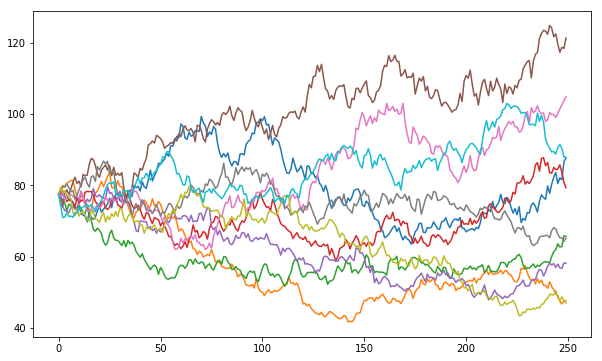

In [8]:
plt.figure(figsize=(10,6))
plt.plot(precio_lista);